In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# def relight_image(image, light_color):

#     # Konwertuj obraz na przestrzeń kolorów LAB (Lightness, A, B)
#     lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

#     # Podziel obraz na poszczególne kanały
#     l_channel, a_channel, b_channel = cv2.split(lab_image)

#     # Modyfikacja kanału L (jasność) dla relightingu
#     # Przyjmij, że zmiana kanału L o wartość dodatnią odpowiada za żółtawe światło
#     l_channel += light_color

#     # Połącz zmodyfikowane kanały w obraz LAB
#     modified_lab_image = cv2.merge((l_channel, a_channel, b_channel))

#     # Przekonwertuj zmodyfikowany obraz LAB z powrotem do przestrzeni kolorów BGR
#     modified_image = cv2.cvtColor(modified_lab_image, cv2.COLOR_LAB2BGR)

In [58]:
# def compute_lighting_map(input_image, target_image):
#     # Obliczanie różnicy między obrazami docelowymi i wejściowymi
#     diff_image = cv2.absdiff(input_image, target_image)
#     # Przetwarzanie różnicy na mapę oświetlenia
#     lighting_map = cv2.cvtColor(diff_image, cv2.COLOR_BGR2GRAY)
#     return lighting_map

# def relight_image(input_image, lighting_map):
#     # Normalizacja mapy oświetlenia
#     normalized_map = lighting_map.astype(float) / 255.0
#     # Aplikowanie mapy oświetlenia do obrazu wejściowego
#     relighted_image = np.clip((input_image.astype(float) + normalized_map * 50), 0, 255).astype(np.uint8)
#     return relighted_image

In [59]:
# def relight_object(input_images):
#     # Initialize an empty array to store the accumulated lighting information
#     lighting_map = np.zeros_like(input_images[0], dtype=np.float32)
#     relighted_object = np.zeros_like(input_images[0], dtype=np.float32)

#     # Accumulate lighting information from each input image
#     for img in input_images:
#         # Convert the input image to grayscale
#         for channel in range(3):
#             # Normalize the grayscale image
#             normalized_img = img[channel].astype(float) / 255.0
#             # Accumulate the normalized image
#             lighting_map[channel] += normalized_img # Add a new axis for broadcasting

#     # Average the accumulated lighting information
#     lighting_map /= len(input_images)

#     # Apply the accumulated lighting map to relight the object
    
#     for input_image in input_images:
#         relighted_object += np.clip((input_image.astype(float)/255 + lighting_map), 0, 255).astype(np.uint8)

#     return relighted_object

In [60]:
# def relight_object_maximum(input_images):
#     # Initialize an empty array to store the accumulated lighting information
#     lighting_map = np.zeros_like(input_images[0], dtype=np.float32)
#     relighted_object = np.zeros_like(input_images[0], dtype=np.float32)
#     max_brightness = np.zeros_like(input_images[0], dtype=np.float32)
#     # Accumulate lighting information from each input image
#     # for img in input_images:
#     #     # Convert the input image to grayscale
#     #     for channel in range(3):
#     #         # Normalize the grayscale image
#     #         normalized_img = img[channel].astype(float) / 255.0
#     #         # Accumulate the normalized image
#     #         lighting_map[channel] += normalized_img # Add a new axis for broadcasting

#     # for i in range(len(input_images)):
#     #     input_images[i] = cv2.cvtColor(input_images[i], cv2.COLOR_BGR2GRAY)
        
#     input_mean = np.stack(input_images, 0).mean(0)/255

#     max_brightness = np.maximum.reduce(input_images)
#     min_brightness = np.minimum.reduce(input_images)

#     # return np.clip(np.maximum.reduce(input_images), 0, 255).astype(np.uint8)
#     return np.clip(max_brightness, 0, 255).astype(np.uint8)
#     # # Average the accumulated lighting information
#     # lighting_map /= len(input_images)

#     # # Apply the accumulated lighting map to relight the object
    
#     # for input_image in input_images:
#     #     relighted_object += np.clip((input_image.astype(float)/255 + lighting_map), 0, 255).astype(np.uint8)

#     # return relighted_object

In [61]:
# def relight_object(images):
#     # Convert images to grayscale
#     gray_images = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images]

#     # Estimate surface normals for each image
#     gradients = [np.dstack((cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5),
#                             cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5),
#                             np.ones_like(gray))) for gray in gray_images]

#     # Select lighting environment
#     light_direction = np.array([0, 0, 1])  # Example: overhead lighting

#     # Calculate lighting intensity for each image
#     intensities = [np.dot(gradient, light_direction) for gradient in gradients]

#     # Clamp intensity values to [0, 255] and convert to uint8
#     intensities = [np.clip(intensity, 0, 255).astype(np.uint8) for intensity in intensities]

#     # Apply lighting to images
#     relit_images = [cv2.merge([intensity] * 3) for intensity in intensities]

#     # Blend relit images
#     output_image = np.zeros_like(images[0], dtype=np.float32)
#     for relit_image in relit_images:
#         output_image += relit_image.astype(np.float32) / len(relit_images)
#     print(output_image)
#     # Convert back to uint8
#     return np.clip(output_image, 0, 255).astype(np.uint8)

In [62]:
# def estimate_lighting(images):
#     # Calculate average intensity for each pixel for each color channel
#     max_intensity = np.minimum.reduce(images)
    
#     # Normalize the intensity values
#     normalized_intensity = (max_intensity - np.min(max_intensity)) / (np.max(max_intensity) - np.min(max_intensity))
    
#     return normalized_intensity

# def relight_object(image, intensity):
#     # Normalize intensity    
#     # Ensure the intensity array has the same shape as the image    
#     # Apply the scaled intensity to the original image
#     relighted_image = np.clip(np.maximum.reduce(image) * intensity, 0, 255).astype(np.uint8)
    
#     return relighted_image

In [63]:
# def estimate_lighting(image):
#     # Compute the mean intensity for each color channel
#     r_mean = np.mean(image[:, :, 0])
#     g_mean = np.mean(image[:, :, 1])
#     b_mean = np.mean(image[:, :, 2])
    
#     # Return the mean intensity for each channel
#     return r_mean, g_mean, b_mean

# def relight_object(images):
#     num_images = len(images)
#     height, width, _ = images[0].shape
    
#     # Accumulate relit image
#     relit_image = np.zeros((height, width, 3), dtype=np.float32)
    
#     # Accumulate total lighting for each channel
#     total_lighting = np.zeros(3, dtype=np.float32)
    
#     # Accumulate weights for normalization
#     total_weight = 0.0
    
#     # Loop over all images
#     for img in images:
#         # Estimate lighting for each channel
#         r_lighting, g_lighting, b_lighting = estimate_lighting(img)
        
#         # Normalize image intensities
#         normalized_img = img.astype(np.float32) / 255.0
        
#         # Calculate weight based on lighting intensity
#         weight = r_lighting + g_lighting + b_lighting
        
#         # Accumulate total lighting and weight
#         # total_lighting[0] += r_lighting * weight
#         # total_lighting[1] += g_lighting * weight
#         # total_lighting[2] += b_lighting * weight
#         total_weight += weight
        
#         # Accumulate relit image
#         relit_image += normalized_img * weight
    
#     # Normalize total lighting
#     # total_lighting /= total_weight
    
#     # Normalize relit image
#     relit_image /= total_weight
#     relit_image *= 255.0
#     relit_image = np.clip(relit_image, 0, 255).astype(np.uint8)
    
#     return relit_image

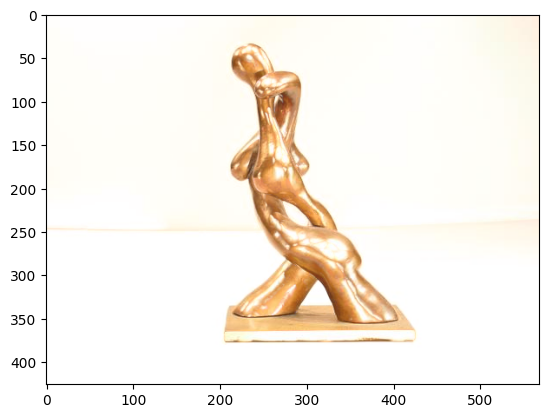

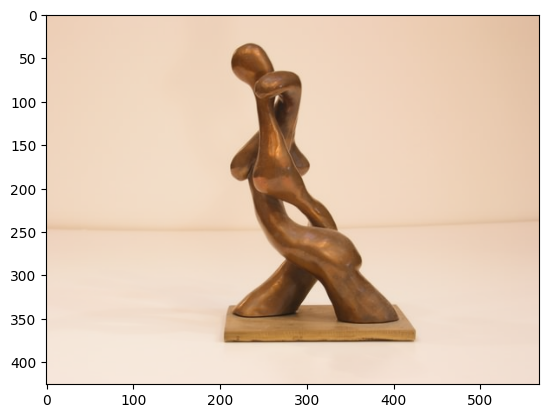

In [64]:
input_images = [cv2.imread(f'./bronze/IMG_{i}.JPG') for i in range(3083, 3099)]
plt.figure()
plt.imshow(cv2.cvtColor(np.maximum.reduce(input_images),cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(cv2.cvtColor(np.mean(np.array(input_images), axis=0).astype(np.uint8),cv2.COLOR_BGR2RGB))

    # plt.imshow(cv2.cvtColor(input_images[0],cv2.COLOR_BGR2RGB))
